## EXTRA_CARBON


In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import arrow
import glob
import sys
#sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
import extract_bylayer_mean as ebm
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

### [A] Map definition and station definition

Text(0.5, 1.0, 'individual stations')

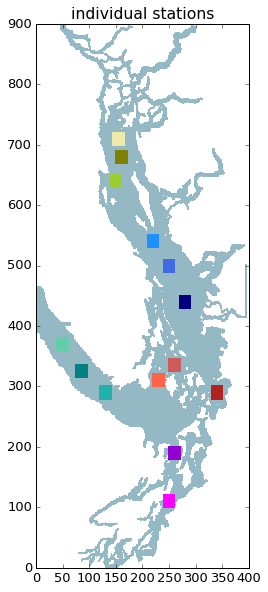

In [14]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'

ps_x = 250; ps_y = 110; ps_col = 'magenta'
ps2_x = 260; ps2_y = 190; ps2_col = 'darkviolet'
# ps2_x = 
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

rect_ps = Rectangle((ps_x-10,ps_y-10),20,20,linewidth=2,edgecolor=ps_col,facecolor=ps_col)
ax0.add_patch(rect_ps)
rect_ps = Rectangle((ps2_x-10,ps2_y-10),20,20,linewidth=2,edgecolor=ps2_col,facecolor=ps2_col)
ax0.add_patch(rect_ps)


ax0.set_title('individual stations')




reload(ebmBOX)

    # reload(ebmBOX)

    # #(start, end, ftype, sdir, varname, fname, y, x)
    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = pkldir + 'BR3_DIC_means_cs2_BOX'
    # y = cs2_y; x = cs2_x
    # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

run for PI4, BR3 for the above 12 stations, usage case above


In [15]:
## 
reload(ebm)

#(start, end, ftype, sdir, varname, fname, y, x)
pkldir = './pkls/'
start = '2017-01-01' #start of timeperiod
end = '2017-12-31' #end of timeperiod (typically a year)
ftype = 'carp' #type of model result .nc 

# sdir = 'CAR50/' #where under directory tree do we find nps 
# varname = 'dissolved_inorganic_carbon' #name of variable

# fname = pkldir + 'CAR50_DIC_means_fullyear'
# ebm.extractor(start, end, ftype, sdir, varname, fname)


sdir = 'NEWBUDGET/' #where under directory tree do we find nps 
varname = 'dissolved_inorganic_carbon' #name of variable


fname = pkldir + 'NEWBUDGET_DIC_means_fullyear'
ebm.extractor(start, end, ftype, sdir, varname, fname)



0
50
100
150
200
250
300
350
done making nclen
0
nansum(dataset) -checksum to make sure inlet mask works - false/true should give different answers
4221499000.0
60
120
180
240
300
360


In [16]:
# ## 
# reload(ebm)

# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = './pkls/'
# start = '2017-01-01' #start of timeperiod
# end = '2017-04-30' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 


0.1931340144230944
4.57758976862965
7.171859349959732
8.986218574719487
10.386515299479015
10.859262319711661
11.343465169270985
11.529046474358893
12.482359274839837
13.566903921273934
14.47618376903074
15.643244816706556


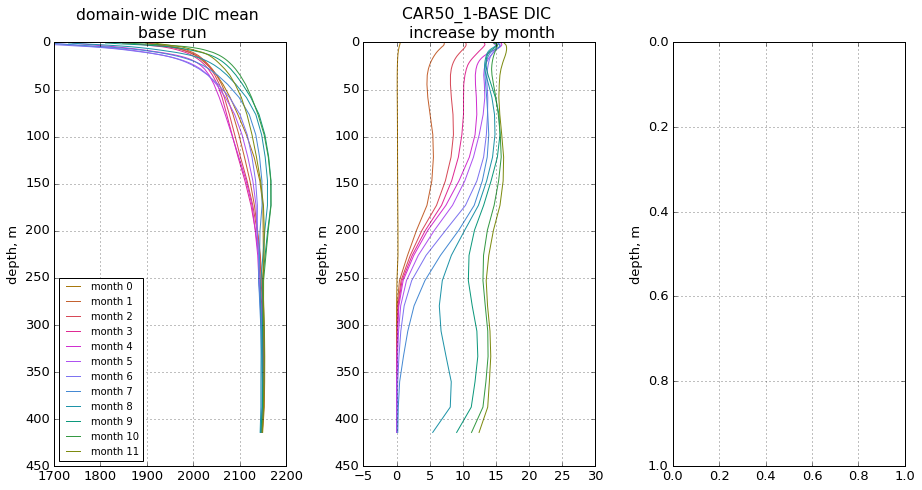

In [27]:
NB_DIC_to30apr = pickle.load(open('./pkls/NEWBUDGET_DIC_means_fullyear.pkl', 'rb')) 
C50_DIC_to30apr = pickle.load(open('./pkls/CAR50_DIC_means_fullyear.pkl', 'rb')) 
# print(np.shape(NB_DIC_to30apr))

# print(NB_DIC_to30apr[:,90])

#getting depths
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depth = (w['gdept_1d'][0,:])

tcm = cm.phase


fact = 0.5
fig, axs = plt.subplots(1,3, figsize=(26*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    print(np.nanmean(C50_DIC_to30apr[:,i*30])-np.nanmean(NB_DIC_to30apr[:,i*30]))
    axs[0].plot(NB_DIC_to30apr[:,i*30], depth, color = tcm((i)/12),linestyle = '-', label = f'month {i}')
    axs[1].plot(C50_DIC_to30apr[:,i*30]-NB_DIC_to30apr[:,i*30], \
                depth, color = tcm((i)/12),linestyle = '-', label = f'month {i}')
# axs[0].invert_yaxis()
# axs[0].set_xlim([1700,2200])
# axs[0].grid()
# axs[0].legend(loc = 'best', fontsize = 10)
# axs[0].set_title('domain-wide DIC mean \n base run')
# axs[1].set_title('CAR50_1-BASE DIC \n increase by month')
# axs[1].invert_yaxis()
# axs[1].set_xlim([-5,30])
# axs[1].grid()

axs[0].set_xlim([1700,2200])
axs[1].set_xlim([-5,30])
axs[0].legend(loc = 'best', fontsize = 10)

axs[0].set_title('domain-wide DIC mean \n base run')
axs[1].set_title('CAR50_1-BASE DIC \n increase by month')
    
for i in range(0,3):
    axs[i].invert_yaxis()
    axs[i].grid()
    axs[i].set_ylabel('depth, m')

plt.tight_layout()
#axs[1].legend(loc = 'best', fontsize = 10)

In [18]:
# reload(ebmBOX)

# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'MAIN/BR_3rd_2015/' #where under directory tree do we find nps 
# varname = 'dissolved_inorganic_carbon' #name of variable


# fname = pkldir + 'BR3_DIC_means_ps2_BOX'
# y = ps2_y; x = ps2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'BR3_DIC_means_ps_BOX'
# y = ps_y; x = ps_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

In [19]:
# reload(ebmBOX)

# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'PI9/' #where under directory tree do we find ncs 
# varname = 'dissolved_inorganic_carbon' #name of variable


# fname = pkldir + 'PI9_DIC_means_cs2_BOX'
# y = cs2_y; x = cs2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_cs_BOX'
# y = cs_y; x = cs_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_cs3_BOX'
# y = cs3_y; x = cs3_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_haro2_BOX'
# y = haro2_y; x = haro2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_haro_BOX'
# y = haro_y; x = haro_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_haro3_BOX'
# y = haro3_y; x = haro3_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_jdf2_BOX'
# y = jdf2_y; x = jdf2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_jdf_BOX'
# y = jdf_y; x = jdf_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_jdf3_BOX'
# y = jdf3_y; x = jdf3_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_ns2_BOX'
# y = ns2_y; x = ns2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_ns_BOX'
# y = ns_y; x = ns_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_ns3_BOX'
# y = ns3_y; x = ns3_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# #constant
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# inletmask = False #are we masking out Toba/Bute/Jervis?
# sdir = '/PI9' #where under directory tree do we find ncs 

# #changes
# shortdesc = 'PI9_DIC'
# ftype = 'carp' #type of model result .nc 
# varname = 'dissolved_inorganic_carbon' #name of variable
# fname = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/' +shortdesc + '_means_inletsIN' #name of resulting pkl 
# ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)


In [ ]:
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb')) 
print(np.shape(csize))
layervol = np.zeros(40)

for i in range(0,40):
    layervol[i] = np.nansum(csize[i,:,:])
    
#print(layervol)
totalvol = np.nansum(layervol)

umolLmean = np.nansum((diff_mmolm3*layervol)/totalvol)
print(umolLmean)
umolkgmean = np.nansum((diff_umolkg*layervol)/totalvol)
print(umolkgmean)

In [ ]:
print('diff_umol_kg')
print(diff_umolkg)
print('diff_mmolm3')
print(diff_mmolm3)
print('diff_mmolm3-diff_umolkg')
print(diff_mmolm3-diff_umolkg)

In [ ]:
# #where to store
# start = '2015-01-01'
# end = '2015-12-31'
# daily_means = np.zeros((40,365))
# ncfile_ar = []
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)
# #no of days in array
# dayslen = len(arrow_array)

# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     ddmmmyy = tdate.format('DDMMMYY').lower()
#     ymd = tdate.format('YYYYMMDD')
#     pklfile = './pkls/umolkg/PI_DIC_umolkg_' + ymd +'.pkl'
#     ncfile_ar.append(pklfile)
#     if i%50 == 0:
#         print(i)

# print('done making nclen')

# for i in range(0,dayslen):

#     if (i%20 ==0):
#         print(ncfile_ar[i])

# t_test = ncfile_ar[20]
# print(t_test)
# t_test = pickle.load(open(t_test, 'rb'))  

